In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import word_tokenize

In [2]:
project_path = os.path.dirname(os.getcwd())
dataset_path = os.path.join(project_path, 'datasets')
file_name = 'filtered_dataset_with_lyrics.csv'

In [3]:
df = pd.read_csv(os.path.join(dataset_path, file_name), index_col=0)

In [4]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.head(5))

,song_id_from_src,dataset,title,artist,genre,arousal_mean,arousal_std,valence_mean,valence_std,emotion_4Q,emotion_2Q,lyrics,language,general_genre
2,5,PMEmo2019,No Heart,21 Savage,NaN,0.150000,0.175000,0.200000,0.203101,sad,negative,"[Intro] Southside, Southside on the, Southside...",en,NaN
14,18,PMEmo2019,Send My Love (To Your New Lover),Adele,Soul,0.800000,0.139194,0.837500,0.097628,happy,positive,"[Intro] Just the guitar? Okay, cool [Verse 1]...",en,Jazz
15,19,PMEmo2019,Water Under The Bridge,Adele,NaN,0.762500,0.117925,0.750000,0.136931,happy,positive,[Verse 1] If you're not the one for me Then ho...,en,NaN
17,21,PMEmo2019,Faded,Alan Walker,NaN,0.862500,0.117925,0.775000,0.156125,happy,positive,[Verse 1] You were the shadow to my light Did ...,en,NaN
19,25,PMEmo2019,Scars To Your Beautiful,Alessia Cara,NaN,0.761364,0.135413,0.784091,0.151610,happy,positive,[Verse 1] She just wants to be beautiful She g...,en,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2032 entries, 2 to 3510
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_id_from_src  2032 non-null   object 
 1   dataset           2032 non-null   object 
 2   title             2032 non-null   object 
 3   artist            2032 non-null   object 
 4   genre             1311 non-null   object 
 5   arousal_mean      183 non-null    float64
 6   arousal_std       183 non-null    float64
 7   valence_mean      183 non-null    float64
 8   valence_std       183 non-null    float64
 9   emotion_4Q        2032 non-null   object 
 10  emotion_2Q        2032 non-null   object 
 11  lyrics            2032 non-null   object 
 12  language          2032 non-null   object 
 13  general_genre     1284 non-null   object 
dtypes: float64(4), object(10)
memory usage: 238.1+ KB


In [6]:
df.isna().sum()

song_id_from_src       0
dataset                0
title                  0
artist                 0
genre                721
arousal_mean        1849
arousal_std         1849
valence_mean        1849
valence_std         1849
emotion_4Q             0
emotion_2Q             0
lyrics                 0
language               0
general_genre        748
dtype: int64

Text(0.5, 6.79999999999999, 'Lyrics length')

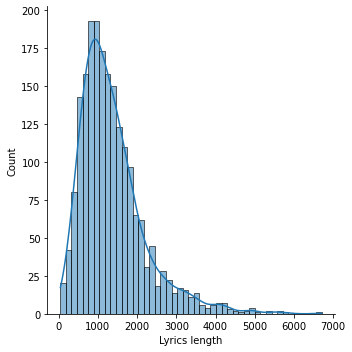

In [7]:
sns.displot(df['lyrics'].str.len(), kde=True)
plt.xlabel('Lyrics length')

Text(0.5, 6.79999999999999, 'Words num')

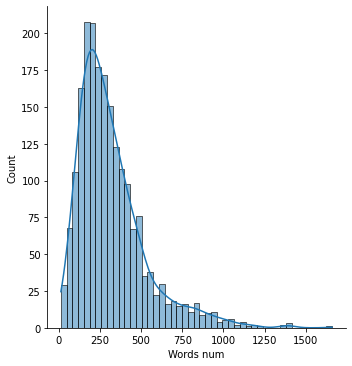

In [8]:
sns.displot(df.apply(lambda x: len(word_tokenize(x['lyrics'])), axis=1), kde=True)
plt.xlabel('Words num')

<AxesSubplot:xlabel='emotion_4Q', ylabel='count'>

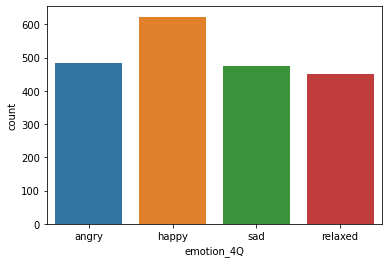

In [9]:
sns.countplot(x="emotion_4Q", data=df, order=['angry', 'happy', 'sad', 'relaxed'])

In [10]:
sorted(df.emotion_4Q.unique())

['angry', 'happy', 'relaxed', 'sad']

<AxesSubplot:xlabel='emotion_2Q', ylabel='count'>

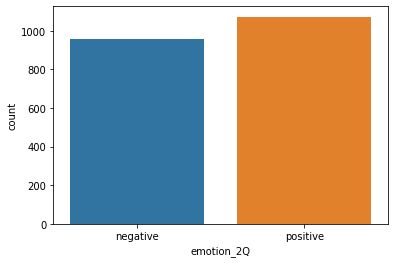

In [11]:
sns.countplot(x="emotion_2Q", data=df)

<AxesSubplot:xlabel='dataset', ylabel='count'>

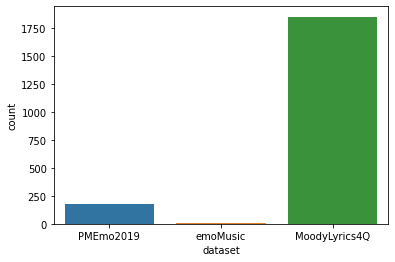

In [12]:
sns.countplot(x="dataset", data=df)

In [13]:
df['dataset'].value_counts()

MoodyLyrics4Q    1849
PMEmo2019         178
emoMusic            5
Name: dataset, dtype: int64

In [14]:
with pd.option_context('display.max_rows', None):
    display(df.genre.value_counts(dropna=False))

NaN                    721
Pop                    141
Alternative Rock       137
Rock                    94
Indie                   84
Thrash Metal            68
Hip-Hop                 64
Metal                   50
Folk                    35
Soul                    35
Country                 29
Electronic              27
Jazz                    26
R&B                     26
Alternative Metal       24
Pop-Rock                24
Heavy Metal             23
Industrial Metal        20
Rap Metal               19
Hard Rock               18
Progressive Metal       18
Punk Rock               17
New Wave                16
Progressive Rock        15
Psychedelic Rock        15
New Age                 13
Nu Metal                13
Synthpop                12
Doom Metal              12
Acoustic                11
Post-Hardcore           10
House                   10
Comedy                   9
Symphonic Metal          9
Ambient                  9
Ska                      9
Metalcore                9
D

In [15]:
with pd.option_context('display.max_rows', None):
    display(df.general_genre.value_counts(dropna=False))

NaN           748
Rock          409
Metal         298
Pop           291
Jazz           76
Hip-Hop        73
Electronic     70
Country        67
Name: general_genre, dtype: int64

<AxesSubplot:xlabel='general_genre', ylabel='count'>

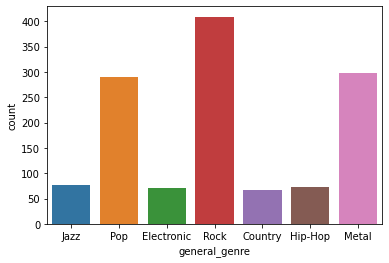

In [16]:
sns.countplot(x="general_genre", data=df)

Text(0, 0.5, 'arousal')

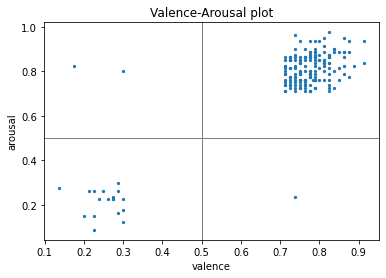

In [17]:
plt.scatter(df.valence_mean.values, df.arousal_mean.values, s=5)
plt.title('Valence-Arousal plot')
plt.axhline(0.5, color='grey', lw=1)
plt.axvline(0.5, color='grey', lw=1)
plt.xlabel('valence')
plt.ylabel('arousal')

In [18]:
train_df = pd.read_csv(os.path.join(dataset_path, 'train_dataset.csv'), index_col=0)
val_df = pd.read_csv(os.path.join(dataset_path, 'val_dataset.csv'), index_col=0)
test_df = pd.read_csv(os.path.join(dataset_path, 'test_dataset.csv'), index_col=0)

<AxesSubplot:xlabel='emotion_4Q', ylabel='count'>

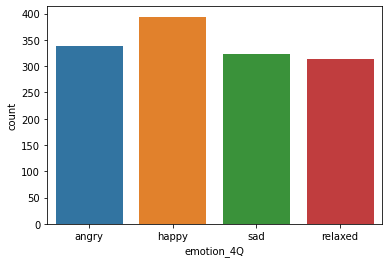

In [19]:
sns.countplot(x="emotion_4Q", data=train_df, order=['angry', 'happy', 'sad', 'relaxed'])

<AxesSubplot:xlabel='emotion_4Q', ylabel='count'>

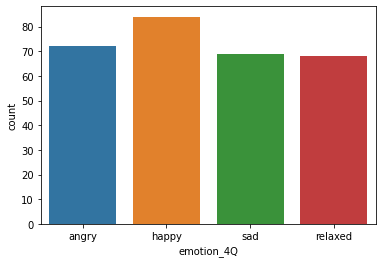

In [20]:
sns.countplot(x="emotion_4Q", data=val_df, order=['angry', 'happy', 'sad', 'relaxed'])

<AxesSubplot:xlabel='emotion_4Q', ylabel='count'>

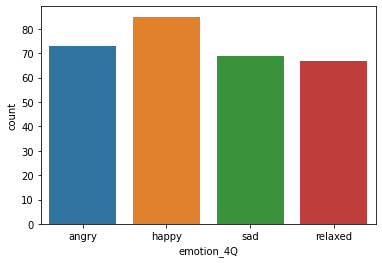

In [21]:
sns.countplot(x="emotion_4Q", data=test_df, order=['angry', 'happy', 'sad', 'relaxed'])